In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
def create_model(inputs,output_size):
    inputs = tf.keras.Input(shape=inputs.shape)
    x = Conv2D(filters=64, kernel_size=3, activation = 'relu', padding='same')(inputs)
    x  = MaxPooling2D(pool_size=2)(x)
    x = BatchNormalization()(x)
    x = Conv2D(filters=32, kernel_size=3, activation='relu', padding='same')(x)
    x  = MaxPooling2D(pool_size=2)(x)
    x = BatchNormalization()(x)
    x = Conv2D(filters=16, kernel_size=3, activation='relu', padding='same')(x)
    x = Flatten()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(output_size, activation='softmax')(x)
    
    return inputs, x
    

In [3]:
output_size = 62
inputs = np.zeros((28, 28, 1))
input_, output = create_model(inputs,output_size = 62)

In [4]:
model = tf.keras.Model(inputs=input_, outputs = output)

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0     

### Load Data

In [6]:
dataset = pd.read_csv('dataset_final.csv', low_memory=False, header=None)

In [7]:
dataset

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138863,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,z
138864,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,z
138865,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,z
138866,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,z


In [8]:
dataset.iloc[:,784].unique()

array(['1', '0', '4', '7', '3', '5', '8', '9', '2', '6', 'W', 'G', 'P',
       'O', 'Q', 'M', 'K', 'V', 'X', 'J', 'N', 'R', 'U', 'Z', 'S', 'E',
       'B', 'Y', 'I', 'L', 'A', 'H', 'D', 'C', 'T', 'F', 'a', 'b', 'c',
       'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p',
       'q', 'r', 's', 'u', 'v', 'w', 'x', 'y', 'z', 't'], dtype=object)

In [9]:
dataset_shuffled = dataset.sample(frac=1)

In [10]:
dataset_shuffled

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
29075,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
122099,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,D
84623,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,L
80880,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,M
1527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87080,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,I
4624,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
16362,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8


In [11]:
x = dataset_shuffled.iloc[:,0:784].values
y = dataset_shuffled.iloc[:,784:].values

In [12]:
le = LabelEncoder()
y = le.fit_transform(y.reshape(-1,))
y = y.reshape(-1,1)
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='drop')
y = ct.fit_transform(y)

In [13]:
y = y.toarray()

In [14]:
y = y.astype(np.float32)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [15]:
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (111094, 784)
x_test shape: (27774, 784)
y_train shape: (111094, 62)
y_test shape: (27774, 62)


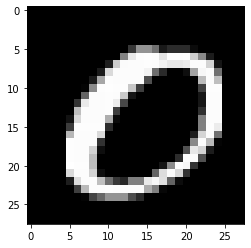

In [16]:
plt.imshow(x[0].reshape(28,28), cmap = 'gray')

In [17]:
train_datagen = ImageDataGenerator(rescale=1./255,
                               rotation_range=10,
                               zoom_range=0.1,
                               shear_range=0.05,
                               fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255,
                               rotation_range=10,
                               zoom_range=0.1,
                               shear_range=0.05,
                               fill_mode='nearest')

train_datagen.fit(x_train.reshape(-1, 28, 28, 1))
validation_datagen.fit(x_test.reshape(-1, 28, 28, 1))


In [18]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

model.compile(loss=tf.keras.losses.categorical_crossentropy,
             optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001),
             metrics=['accuracy'])

In [19]:
le.inverse_transform(np.argmax(y_test[0]).reshape(-1,))

array(['N'], dtype=object)

In [20]:
# history = model.fit(train_datagen.flow(x_train, y_train, batch_size=32),
#                     validation_data=validation_datagen.flow(x_test, y_test, batch_size=16),
#                     epochs=20)

Epoch 1/20
3472/3472 [==============================] - 53s 13ms/step - loss: 0.7551 - accuracy: 0.7873 - val_loss: 0.3649 - val_accuracy: 0.8901
Epoch 2/20
3472/3472 [==============================] - 43s 12ms/step - loss: 0.3601 - accuracy: 0.8901 - val_loss: 0.2793 - val_accuracy: 0.9118
Epoch 3/20
3472/3472 [==============================] - 43s 12ms/step - loss: 0.2791 - accuracy: 0.9110 - val_loss: 0.2376 - val_accuracy: 0.9238
Epoch 4/20
3472/3472 [==============================] - 42s 12ms/step - loss: 0.2374 - accuracy: 0.9227 - val_loss: 0.2133 - val_accuracy: 0.9309
Epoch 5/20
3472/3472 [==============================] - 47s 14ms/step - loss: 0.2079 - accuracy: 0.9309 - val_loss: 0.2006 - val_accuracy: 0.9350
Epoch 6/20
3472/3472 [==============================] - 44s 13ms/step - loss: 0.1865 - accuracy: 0.9367 - val_loss: 0.2007 - val_accuracy: 0.9318
Epoch 7/20
3472/3472 [==============================] - 42s 12ms/step - loss: 0.1715 - accuracy: 0.9411 - val_loss: 0.1803 -

In [54]:
# model.save('ocr_model_v2.h5')

In [131]:
import cv2
image_h = cv2.imread('g.jpg')
image_h = cv2.cvtColor(image_h, cv2.COLOR_BGR2GRAY)
# _ ,binaryImg = cv2.threshold(image_h, 127, 255, cv2.THRESH_BINARY_INV)

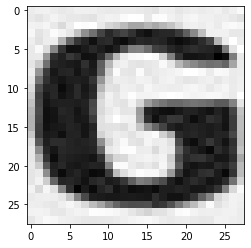

In [133]:
plt.imshow(image_h, cmap='gray')

In [128]:
plt.imsave(fname='g.jpg', arr=image_h)

In [134]:
y_pred = model.predict(image_h.reshape(-1,28,28,1))

1/1 [==============================] - 0s 29ms/step


In [135]:
y_pred = np.argmax(y_pred)

In [136]:
le.inverse_transform([y_pred])

array(['G'], dtype=object)